downloading Cu.pbesol-dn-kjpaw_psl.1.0.0.UPF
Density: 8.94 g/m³


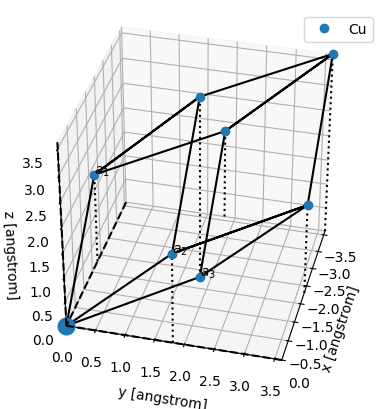

running the scf calculation for cu

     Program PWSCF v.7.3.1 starts on 15Oct2024 at 10:56:34 

     This program is part of the open-source Quantum ESPRESSO suite
     for quantum simulation of materials; please cite
         "P. Giannozzi et al., J. Phys.:Condens. Matter 21 395502 (2009);
         "P. Giannozzi et al., J. Phys.:Condens. Matter 29 465901 (2017);
         "P. Giannozzi et al., J. Chem. Phys. 152 154105 (2020);
          URL http://www.quantum-espresso.org", 
     in publications or presentations arising from this work. More details at
     http://www.quantum-espresso.org/quote

     Serial version
     2104 MiB available memory on the printing compute node when the environment starts

     Reading input from cu.scf.in

     Current dimensions of program PWSCF are:
     Max number of different atomic species (ntypx) = 10
     Max number of k-points (npk) =  40000
     Max angular momentum in pseudopotentials (lmaxx) =  4
     file Cu.pbesol-dn-kjpaw_psl.1.0.0.UPF: wave

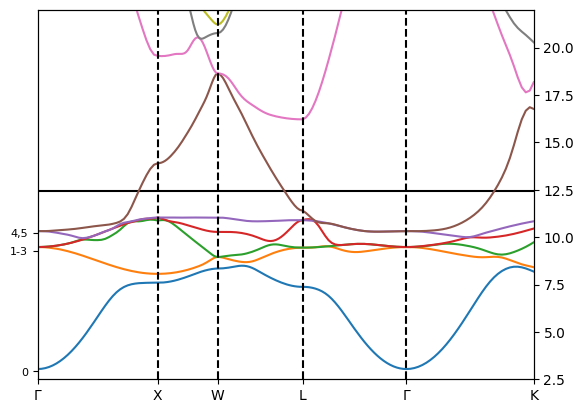

In [1]:
import setup
import numpy as np
from matplotlib import pyplot as plt
from tight_binding_redweasel import Symmetry, kpaths
from tight_binding_redweasel import qespresso_interface as qe

# extend path to include Quantum Espresso
#import os
#qe_path = os.path.expanduser("~/path/to/q-e/bin/")
#if qe_path not in os.environ["PATH"]:
#    os.environ["PATH"] += os.pathsep + qe_path
# customize the MPI command
# qe.mpi_run = "mpirun "

# see PSLibrary at http://pseudopotentials.quantum-espresso.org/legacy_tables/ps-library for the names
qe.qe_prepare({"Cu": "Cu.pbesol-dn-kjpaw_psl.1.0.0.UPF"})

basis = [(0, 0, 0)]
types = ["Cu"]
cu_crystal = qe.QECrystal("cu", qe.fcc(3.6148), basis, types)

print(f"Density: {cu_crystal.mass_density()*1e-3:.2f} g/m³")

cu_crystal.plot_crystal()
plt.show()

if not cu_crystal.read_available():
    cu_crystal.scf(8)
    cu_crystal.nscf(qe.k_grid(16), 10)

k_smpl, bands, symmetries, fermi_energy = cu_crystal.read_bands_crystal()
A_norm = cu_crystal.A / (abs(cu_crystal.A[0,0])*2) # normalisation for fcc and bcc
cu_interp_crystal = kpaths.interpolate(k_smpl, bands, Symmetry(symmetries), method="cubic")
cu_interp = lambda k: cu_interp_crystal(k @ A_norm)

kpaths.FCC_PATH.plot(cu_interp, label_bands="left", ylim=(2.5, 22))
plt.axhline(fermi_energy, color='k')
plt.show()

In [2]:
# compute the density of states in a plottable format
cu_crystal.dos()


     Program DOS v.7.3.1 starts on 15Oct2024 at 10:56:53 

     This program is part of the open-source Quantum ESPRESSO suite
     for quantum simulation of materials; please cite
         "P. Giannozzi et al., J. Phys.:Condens. Matter 21 395502 (2009);
         "P. Giannozzi et al., J. Phys.:Condens. Matter 29 465901 (2017);
         "P. Giannozzi et al., J. Chem. Phys. 152 154105 (2020);
          URL http://www.quantum-espresso.org", 
     in publications or presentations arising from this work. More details at
     http://www.quantum-espresso.org/quote

     Serial version
     2345 MiB available memory on the printing compute node when the environment starts


     Reading xml data from directory:

     ./qe-data/cu.save/
     file Cu.pbesol-dn-kjpaw_psl.1.0.0.UPF: wavefunction(s)  4S 3D renormalized

     IMPORTANT: XC functional enforced from input :
     Exchange-correlation= PBESOL
                           (   1   4  10   8   0   0   0)
     Any further DFT definition will

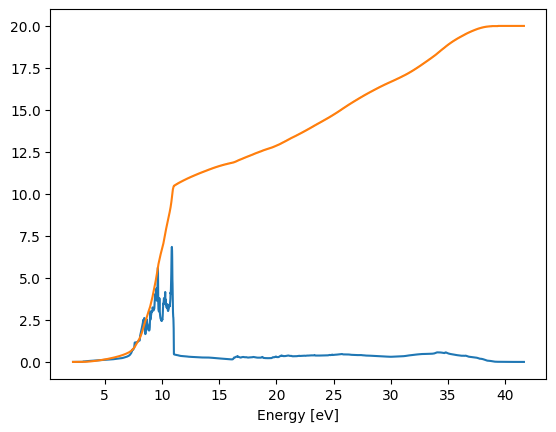

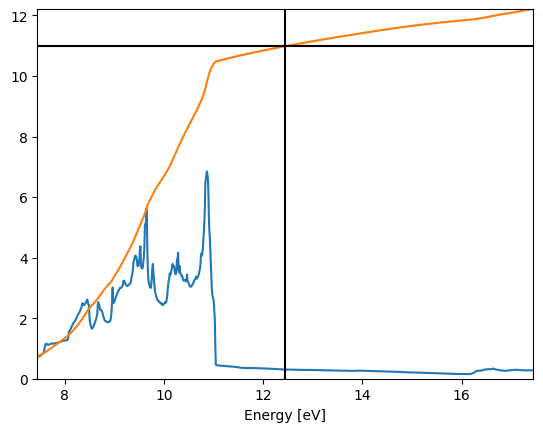

In [3]:
# plot density of states
density_of_states, fermi_energy = cu_crystal.read_dos()
valence_electrons = cu_crystal.read_valence_electrons()

plt.plot(density_of_states[0], density_of_states[1])
plt.plot(density_of_states[0], density_of_states[2])
plt.xlabel("Energy [eV]")
plt.show()

sel = (fermi_energy - 5 < density_of_states[0]) & (density_of_states[0] < fermi_energy + 5)
ymax = max(np.max(density_of_states[2][sel]), np.max(density_of_states[1][sel]))
plt.plot(density_of_states[0][sel], density_of_states[1][sel])
plt.plot(density_of_states[0][sel], density_of_states[2][sel])
plt.axvline(fermi_energy, color='k')
plt.axhline(valence_electrons, color='k')
plt.xlabel("Energy [eV]")
plt.xlim(fermi_energy - 5, fermi_energy + 5)
plt.ylim(0, ymax)
plt.show()

In [4]:
cu_crystal.projections(True)

computing projections onto atomic orbitals for cu

     Program PROJWFC v.7.3.1 starts on 15Oct2024 at 10:58: 6 

     This program is part of the open-source Quantum ESPRESSO suite
     for quantum simulation of materials; please cite
         "P. Giannozzi et al., J. Phys.:Condens. Matter 21 395502 (2009);
         "P. Giannozzi et al., J. Phys.:Condens. Matter 29 465901 (2017);
         "P. Giannozzi et al., J. Chem. Phys. 152 154105 (2020);
          URL http://www.quantum-espresso.org", 
     in publications or presentations arising from this work. More details at
     http://www.quantum-espresso.org/quote

     Serial version
     2394 MiB available memory on the printing compute node when the environment starts


     Reading xml data from directory:

     ./qe-data/cu.save/
     file Cu.pbesol-dn-kjpaw_psl.1.0.0.UPF: wavefunction(s)  4S 3D renormalized

     IMPORTANT: XC functional enforced from input :
     Exchange-correlation= PBESOL
                           (   1   4  10

In [5]:
k_points, bands, (projections, overlaps), fermi_energy, electron_count = cu_crystal.read_projections()
orbitals, spilling = cu_crystal.read_projections_order_spilling()
print("Fermi-Energy:", fermi_energy)
print("Electrons:", electron_count)
print("Overlap Spilling Parameter:", spilling)
print(orbitals)
assert len(orbitals) == projections.shape[3]
print("\nProjections at Γ-Point:")
for i in range(projections.shape[1]):
    print(end=f"{i}: ")
    qe.print_orbitals(projections[0, i, 0], orbitals)

Fermi-Energy: 12.446450955616777
Electrons: 11.0
Overlap Spilling Parameter: 0.0007
['1Cu_s', '1Cu_pz', '1Cu_px', '1Cu_py', '1Cu_dz2', '1Cu_dxz', '1Cu_dyz', '1Cu_dx2-y2', '1Cu_dxy']

Projections at Γ-Point:
0: 1Cu_s: 100.0%
1: 1Cu_dxy: 100.0%
2: 1Cu_dyz: 99.9%
3: 1Cu_dxz: 99.9%
4: 1Cu_dz2: 100.0%
5: 1Cu_dx2-y2: 100.0%
6: None
7: 1Cu_py: 26.0%, 1Cu_pz: 21.8%, 1Cu_px: 11.3%
8: 1Cu_py: 32.0%, 1Cu_px: 13.6%, 1Cu_pz: 13.4%
9: 1Cu_px: 34.2%, 1Cu_pz: 23.8%
